# The PyData Stack

In this lab, you should analyze the famous [Boston Housing Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). 

**The Boston Housing Dataset is deprecated due to an ethical problem (as noted in the scikit-learn documentation above). Instead, I chose to investigate the California Housing Dataset.**

Here's what you should do:
    <li> Load the data into a DataFrame and determine the purpose of the dataset.
    <li> Determine some basic statistics about the features.  Is there any missing data?  How do you know?
    <li> Decide what all the features mean, and their type (hint: explore the stats of each, and the object returned by `load_boston` in the link above).
    <li> Graph histograms of a few appropriate features, and describe what you see.
    <li> Graph scatter plots of the numerical features against the median house price.  What do you take from these graphs?
    <li> Slice the dataset _horizontally_, that is, use boolean indexing to create a sub-DataFrame from your data.  You should find a way to slice it that does something nontrivial: describe why what you've done is interesting (take a look at some of our previous notebooks for examples).
    <li> Create another graph that justifies that the above is interesting.
    <li> Knowing that this datset is typically used in regression to predict the value of the house, slice the data _vertically_, that is, remove some columns that you believe are not helpful for this task.  Justify your reasoning (from the steps you've taken before this).
    <li> Throughout all of the above, discuss what you're seeing in markdown cells, and use markdown appropriately to create headers to break up the analysis.  It's okay if you're wrong or just confused/unsure about your observations--this lab is about experimentation and playfulness with data!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

plt.style.use("fivethirtyeight")

## Ethical Issues in the Boston Housing Dataset

In [2]:
boston_housing_test = datasets.load_boston()

C:\Users\xzhou\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

Note that the Boston Housing dataset, when loaded above, gives a warning about being deprecated due to an ethical issue. I've looked around the sources given in the documentation (particularly this article: [racist data destruction?](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8)), and the reason appears to be the variable $B$, which accounts for the *black proportion of the population*. 

Even ignoring the offensive nature and systemic racism perpetuated by the inclusion of this variable (however, note that it may be argued that including the variable is not inherently wrong, as studying and identifying systemic differences between populations could be useful), there's a main statistical problem with this variable, as it is defined as
$$B=1000(B_k-0.63)^2,$$
where $B_k$ is the proportion of black people by town. The problem here is that the function is **non-invertible**, so some data is lost, as we are automatically assuming that, for example, $B_k=0.36$ and $B_k=0.90$ behave the same, which is not obviously true in any capacity, and it may allow the model to conclude that racial self-segregation increases housing prices. Even if this claim is true, it should be included in the model, not the dataset (which should just have plain $B_k$ values). **Data has been erased**, and potentially maliciously.

## Exploring the California Housing Dataset

In the work below, we use the [California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) instead. I have not investigated whether this suffers from similar ethical problems.

### Basic Features

In [3]:
california_housing = datasets.fetch_california_housing()

print(california_housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


Let's determine the goal of this dataset by printing the feature and target names:

In [4]:
print(california_housing.feature_names)
print(california_housing.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


It appears that the goal of this dataset is to determine the **median house value** in a neighborhood using a few parameters. At first glance, this is what I believe the features to mean:

* **MedInc**: It's not obvious if this is the median income of each person in the population or the median income of each household. I would assume the latter, but I will try to investigate this.
* **HouseAge**: Probably just the mean or median of the ages of the houses in a neighborhood.
* **AveRooms**: Self explanatory--the average number of rooms in a household.
* **AveBedrms**: Self explanatory--the average number of bedrooms in a household.
* **Population**: Self explanatory--the population of the neighborhood.
* **AveOccup**: Probably the average number of *occupants* per household (I thought *occupation* at first, but that didn't really make since, and median income already would cover that sort of variable).
* **Latitude** and **Longitude**: The geographic location of the neighborhood.

Anyway, let's print out this data:

In [5]:
# print(california_housing.DESCR)

data = california_housing.data
target = california_housing.target

# print(data)
df = pd.DataFrame(data, columns=california_housing['feature_names'])
display(df.head(10))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


We can add in the target column now too:

In [6]:
df[california_housing.target_names[0]] = target
display(df.head(10))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Let's check for some missing data.

In [7]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Seems like there isn't any!

Let's look at some basic statistics that `pandas` can give us:

In [8]:
display(df.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Seems like all our data is here. Everything also seems to be scaled in some way.

### Searching for Patterns and Irregularities

First thing that I think we should investigate is **AveRooms** and **AveBedrms**: I'd imagine they'd be generally quite correlated in this datatset! Let's plot one against the other:

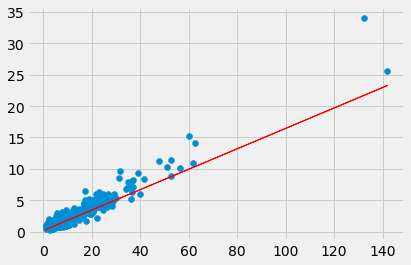

In [9]:
plt.scatter(df['AveRooms'], df['AveBedrms'])

x = np.array(df['AveRooms'])
y = np.array(df['AveBedrms'])
m, b = np.polyfit(x,y,1)
plt.plot(x,m*x+b, 'r', linewidth=1)

plt.show()

It looks like a really tight fit! This means we could probably throw out one of these variables in the model. 

I'll keep **AveBedrms** for now, and use a vertical slice to cut out **AveRooms**. This is because this variable is not helpful for the task as it captures the same information as the **AveBedrms** variable.

In [10]:
# pd.concat([df.iloc[:,:2],df.iloc[:,3:]],axis=1)

df_red = df[['MedInc','HouseAge','AveBedrms','Population','AveOccup','Latitude','Longitude','MedHouseVal']]

display(df_red)

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,39.43,-121.32,0.847


Finally, let's plot some of the remaining variables using some more vertical slicing and `seaborn`.

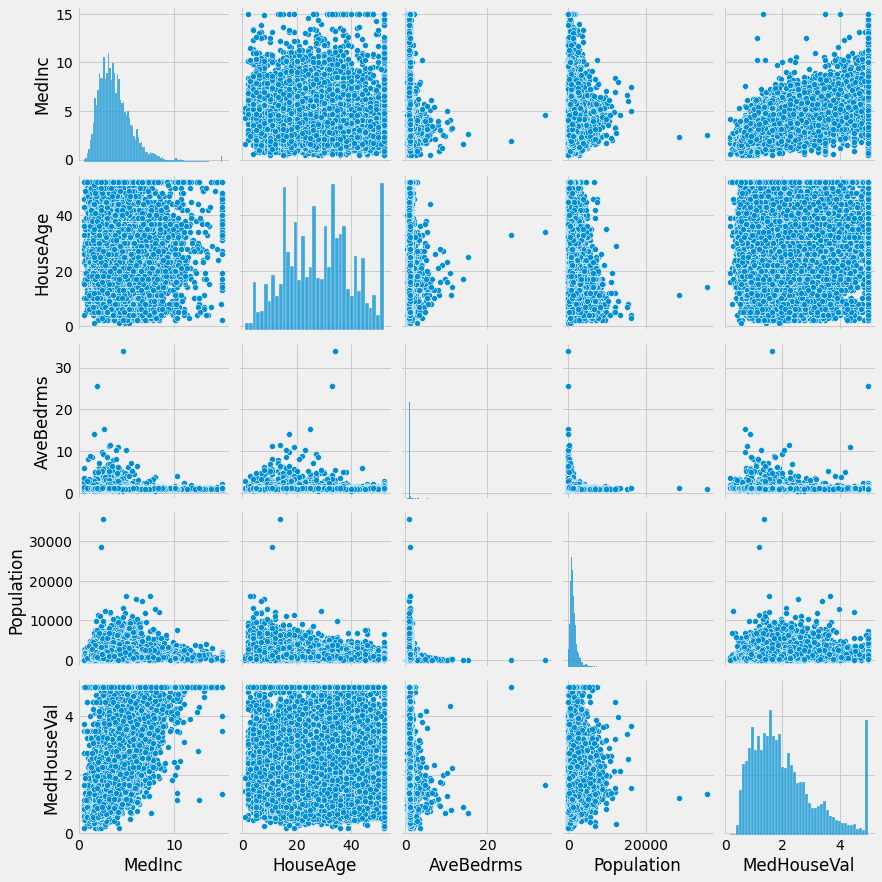

In [11]:
df_fewer_cols = df[['MedInc','HouseAge','AveBedrms','Population','MedHouseVal']]

sns.pairplot(df_fewer_cols);

One thing that stands out to me is that random spike for **MedHouseVal** at the right, around 5.0. The distribution for **HouseAge** is also quite weird, and far from normal. My gut instinct is that either a) some people rounded to nice values when writing down their house ages or b) there happened to be a lot of development at certain years in history resulting in spikes for those ages.

Let's investigate the first problem, which will allow us to use some horizontal slicing. First let's plot a more detailed histogram to see what's going on.

(array([   9.,  190., 1450., 1947., 1927., 2033., 2371., 1958., 1471.,
        1455., 1123.,  840.,  583.,  631.,  547.,  334.,  267.,  210.,
         187.,  115.,  992.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25]),
 <BarContainer object of 21 artists>)

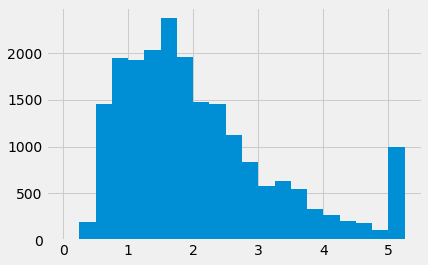

In [12]:
bins = [0.25*i for i in range(22)]

plt.hist(df['MedHouseVal'], bins)

Looks like these values are all over 5. Let's *horizontally slice* the DataFrame to extract these values.

In [13]:
df_red[df_red['MedHouseVal'] > 5]

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,1.102426,1179.0,3.177898,34.21,-118.69,5.00001
